In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions:

In the following block the function that are used for the numerical analysis are defined. These are functions for calculation of the various time steps, plotting tables and plotting graphs.

In [2]:
def f(t,y,a,b,i):
    if (t>i):
        a = 0
    du = a-(b+1)*y[0,0]+(y[0,0]**2)*y[0,1]
    dv = b*y[0,0]-(y[0,0]**2)*y[0,1]    
    return np.matrix([du,dv])

def FE(t,y,h,a,b,i):
    f1 = f(t,y,a,b,i)
    pred = y + f1*h
    corr = y + (h/2)*(f((t+h),pred,a,b,i) + f1)
    return corr

def Integrate(y0, t0, tend, N,a,b,i):
    h = (tend-t0)/N

    t_arr = np.zeros(N+1)
    t_arr[0] = t0

    w_arr = np.zeros((2,N+1))
    w_arr[:,0] = y0

    t = t0
    y = y0
    for k in range(1,N+1):
        y = FE(t,y,h,a,b,i)
        w_arr[:,k] = y
        t = t + h
        t_arr[k] = t
        
    return t_arr, w_arr

def PrintTable(t_arr, w_arr):
    print ("%6s %6s: %17s %17s" % ("index", "t", "u(t)", "v(t)"))
    for k in range(0,N+1):
        print ("{:6d} {:6.2f}: {:17.7e} {:17.7e}".format(k,t_arr[k],
                                                        w_arr[0,k],w_arr[1,k]))     

def PlotGraphs(t_arr, w_arr):
    plt.figure("Initial value problem")
    plt.plot(t_arr,w_arr[0,:],'r',t_arr,w_arr[1,:],'--')
    plt.legend(("$u(t)$", "$v(t)$"),loc="best", shadow=True)
    plt.xlabel("$t$")
    plt.ylabel("$u$ and $v$")
    plt.title("Graphs of $u(t)$ and $v(t)$")
    plt.show()
    
def PlotGraphs2(t_arr, w_arr):
    plt.figure("Initial value problem")
    plt.plot(w_arr[0,:],w_arr[1,:],'g')
    plt.legend(("$u,v$",""),loc="best", shadow=True)
    plt.xlabel("$u(t)$")
    plt.ylabel("$v(t)$")
    plt.title("$Phase$ $plane$ $(u,v)$")
    plt.axis("scaled")
    plt.show()

# Assignment 2.9
Integrate the system with Modified Euler and time step h = 0.15. Make a table of u and v on the time interval 0 ≤ t ≤ 1.5. The table needs to give u and v in an 8-digit floating-point format.

In [3]:
y0 = np.matrix([0.0,0.0])
t0 = 0.0
tend = 1.5
N = 10

t_array, w_array = Integrate(y0, t0, tend, N,2,4.5,11)
print("The integrated system using Modified Euler with time step h = 0.15 is shown in the following table: \n")
PrintTable(t_array, w_array)



The integrated system using Modified Euler with time step h = 0.15 is shown in the following table: 

 index      t:              u(t)              v(t)
     0   0.00:     0.0000000e+00     0.0000000e+00
     1   0.15:     1.7625000e-01     1.0125000e-01
     2   0.30:     2.6892423e-01     2.7050835e-01
     3   0.45:     3.1921278e-01     4.7380077e-01
     4   0.60:     3.4812212e-01     6.9371767e-01
     5   0.75:     3.6633149e-01     9.2138423e-01
     6   0.90:     3.7927846e-01     1.1522633e+00
     7   1.05:     3.8975403e-01     1.3839990e+00
     8   1.20:     3.9921620e-01     1.6153246e+00
     9   1.35:     4.0845332e-01     1.8455103e+00
    10   1.50:     4.1792028e-01     2.0740846e+00


# Assignment 2.10
Integrate the system with Modified Euler and time step h = 0.05 for the interval [0,20]. Make plots of u and v as functions of t (put them in one figure). Also make a plot of u and v in the phase plane (u,v-plane). Do your plots correspond to your results of part 2?

In this assignment the system has to be integrated using Modified Euler with a time step of h = 0.05 on 
a interval of [0,20].
The first graph is u(t) and v(t) against time (t).


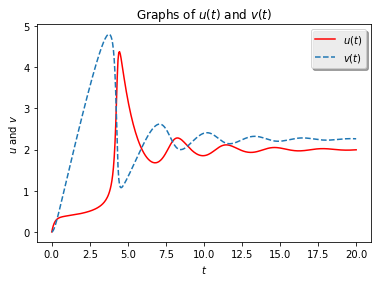

The second graph shows the u-v plane


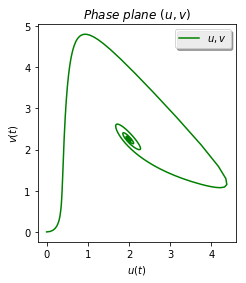

In [4]:
y0 = np.matrix([0.0,0.0])
t0 = 0.0
tend = 20
N = 400

t_array, w_array = Integrate(y0, t0, tend, N,2,4.5, 25)

print("In this assignment the system has to be integrated using Modified Euler with a time step of h = 0.05 on \na interval of [0,20].")
print("The first graph is u(t) and v(t) against time (t).")
PlotGraphs(t_array, w_array)
print("The second graph shows the u-v plane")
PlotGraphs2(t_array, w_array)

Although the direction cannot be seen in the phase plane graph. Using the first plot one can see that u(t) and v(t) will go to an equilibrium as time is increasing.
Therefor the system is stable and a spiral. Which is consistent with the conclusion from assignment 1.3.

# Assignment 2.11
Using the formula derived in question 7, estimate the accuracy of u and v computed with h = 0.05 at t = 8. Hence, integrate once more with time step h = 0.1.

The error can be estimated with Richardson's method. We will use α = 1/3 found in assignment 7. Here the estimated error is: E ≈ α( w(h) - w(2h) ).

In [5]:
y0 = np.matrix([0.0,0.0])
t0 = 0.0
tend = 20
N = 400

t_array, w_array = Integrate(y0, t0, tend, N, 2, 4.5,25)

y0 = np.matrix([0.0,0.0])
t0 = 0.0
tend = 20
N = 200

t_array2, w_array2 = Integrate(y0, t0, tend, N, 2, 4.5, 25)

print("The value for u and v at t = 8.00 with h = 0.05 is: {:.2f} {:.7e} {:.7e}".format(t_array[160], w_array[0,160],w_array[1,160]))
print("The value for u and v at t = 8.00 with h = 0.10 is: {:.2f} {:.7e} {:.7e}".format(t_array[80], w_array[0,80],w_array[1,80]))

The value for u and v at t = 8.00 with h = 0.05 is: 8.00 2.2294777e+00 2.1465017e+00
The value for u and v at t = 8.00 with h = 0.10 is: 4.00 1.3812297e+00 4.5709211e+00


In [6]:
E1 = (w_array[0,160]-w_array2[0,80])*(1/3)
E2 = (w_array[1,160]-w_array2[1,80])*(1/3)
print("The estimated accuracy for u is: {:.7e}".format(E1))
print("The estimated accuracy for v is: {:.7e}".format(E2))

The estimated accuracy for u is: 3.5890366e-03
The estimated accuracy for v is: -3.9656575e-03


# Assignment 2.12
Apply Modified Euler with h = 0.05. For 0 ≤ t ≤ t1 it holds that a = 2. At t = t1 the supply of materials A fails, and therefore a = 0 for t > t1. Take t1 = 4.0. Make plot of u and v as a function of t on the intervals [0, 10] in one figure and a plot of u and v in the uv-plane. Evaluate your results by comparing them to your findings form part 8.

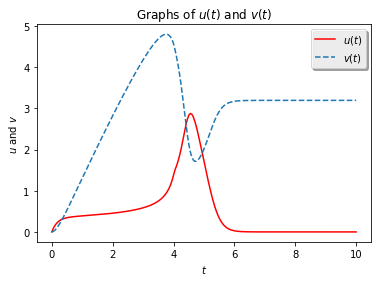

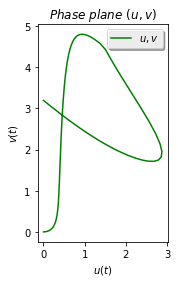

In [7]:
y0 = np.matrix([0.0,0.0])
t0 = 0.0
tend = 10.0
N = 200

t_array, w_array = Integrate(y0, t0, tend, N, 2, 4.5, 4)


PlotGraphs(t_array, w_array)
PlotGraphs2(t_array, w_array)

The first plot shows that u and v indeed converges to a certain value, as predicted in assignment 8. The phase plane shows that uv goes to a point on the u-axis. This was also predicted in assignment 8.
The first plot shows a "corner" in the u and v graph (a discontinuity in the first derivative). This does not contradict the theory, the system of differential equtions its first derivative does not have to be continuous. The line itself is continuous because of the initial conditions. 


# Assignment 2.13
Take t1 = 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0. Make a table of the value of v-tilde and t-tilde. Evaluate your results.

In [8]:
for i in np.arange(3.0,6.5,0.50):
    t0 = 0
    tend = 10
    N = 200
    t_array2, w_array2 = Integrate(y0, t0, tend, N, 2.0, 4.5,i)
    indices = np.nonzero(w_array2[0,:] >= 0.01)
    index = np.max(indices[0])
    t_tilde = t_array2[index+1]
    v_tilde = w_array2[1,N]
    if i == 3: 
        print("%6s %17s: %17s " % ("t1", "t_tilde", "v_tilde"))
    print("{:6.2f} {:17.2f} {:17.7e}".format(i,t_tilde,v_tilde)) 


    t1           t_tilde:           v_tilde 
  3.00              3.90     4.6548679e+00
  3.50              4.55     5.2387123e+00
  4.00              6.20     3.1942867e+00
  4.50              6.30     3.0999532e+00
  5.00              6.60     3.1138961e+00
  5.50              6.95     3.1923155e+00
  6.00              7.35     3.3476197e+00


In the table above are the values for t-tilde and v-tilde shown. There is not an obvious relation between the time(t1) and t-tilde nor an obvious relation between t1 and v-tilde. However we can conclude that if t1 becomes larger t-tilde becomes larger. This cannot be concluded for v-tilde. The value for v-tilde seems to converge to an arbitrarily value between 3.0 and 3.5 (clearly dependent on the initial conditions). The convergence of v_tilde is also consistent with the findings in assignment 1.8.